https://github.com/yumingj/DeepFashion-MultiModal?tab=readme-ov-file

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Change colour of top 

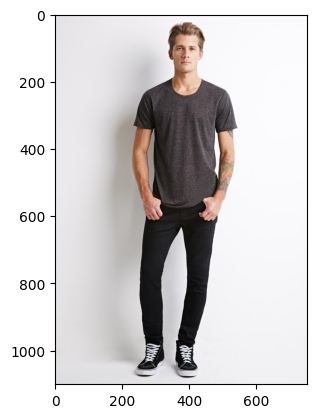

In [17]:
# Load the original image 
original_img_path = 'data/images/MEN-Denim-id_00000080-01_7_additional.jpg'  # Replace with your image path
original_img = Image.open(original_img_path)
original_img = np.array(original_img)

plt.imshow(original_img)

# Load the segmentation map
segm_path = '/home/solarspaceclouds/Desktop/DeepFashion/data/segm/MEN-Denim-id_00000080-01_7_additional_segm.png'  # Replace with your segmentation map path
segm = Image.open(segm_path)
segm = np.array(segm)

In [18]:

# Check if original image is in RGB format
if original_img.shape[2] != 3:
    raise ValueError("Original image is not in RGB format")

In [19]:
# Function to change color
def change_top_color(original_img, segm, new_color):
    img = original_img.copy()
    top_label = 1  # Label for 'top'
    mask = segm == top_label

    # Apply the mask to each color channel
    for c in range(3):  # RGB channels
        img[:, :, c][mask] = new_color[c]

    return img

In [20]:
# Apply the function
new_color = (255, 0, 0)  # New color for 'top', e.g., red
modified_img = change_top_color(original_img, segm, new_color)

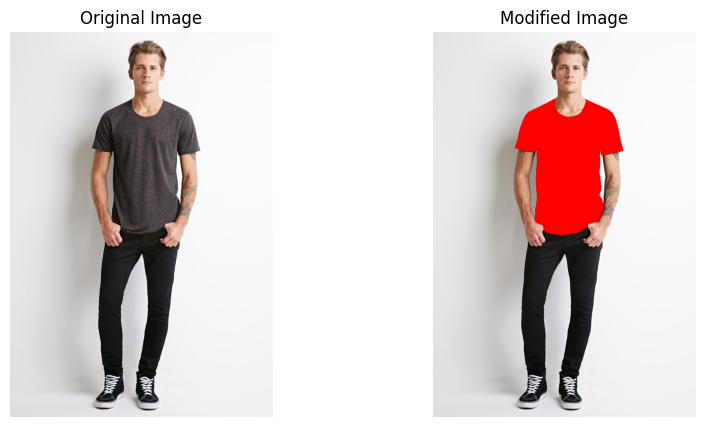

In [21]:
# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_img)
plt.title('Modified Image')
plt.axis('off')

plt.show()


Here the result is a single-coloured shirt (which looks unnatural because the creases/shadows are missing)


# Change colour of top while preserving original shading (brightness and contrast)


To retain the shading of the original 'top' region while changing its color, we need to blend the new color with the original color of the pixels in a way that preserves the original brightness and contrast. So let's do that! :) 

A common approach to achieve this is to use the Hue-Saturation-Value (HSV) color model. 
(Hue and saturation values define the color and its intensity.)
In this model, you can replace the hue (and possibly saturation) of the original pixels with those of the new color while keeping the original value (brightness).

Key Steps:

1. Convert the original RGB image to the HSV color space.
2. Create a mask for the 'top' label from the segmentation map.
3. For the masked 'top' area, replace the hue (and optionally saturation) with that of the new color.
4. Convert the modified HSV image back to RGB.


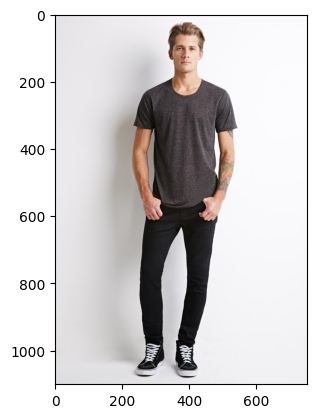

In [168]:
plt.imshow(original_img)

In [196]:
# Convert the original image to HSV
hsv_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)

# New color in HSV (convert the RGB to its corresponding HSV values
# new_hue, new_saturation, _ = (0, 255, 255)  #  new color in HSV
indigo = [120, 255, 255]
red = [0, 255, 255]
teal = [100, 170, 170]

new_hue, new_saturation, _ = indigo  

In [197]:

# Define the function to change color
def change_top_color_hsv(hsv_img, segm, new_hue, new_saturation):
    hsv_img = hsv_img.copy()
    
    top_label = 1  # Label for 'top'
    mask = segm == top_label

    # Replace hue and saturation for 'top' area
    hsv_img[:, :, 0][mask] = new_hue
    hsv_img[:, :, 1][mask] = new_saturation

    return hsv_img

In [198]:
# Apply the function
modified_hsv_img = change_top_color_hsv(hsv_img, segm, new_hue, new_saturation)

# Convert back to RGB
modified_rgb_img = cv2.cvtColor(modified_hsv_img, cv2.COLOR_HSV2RGB)

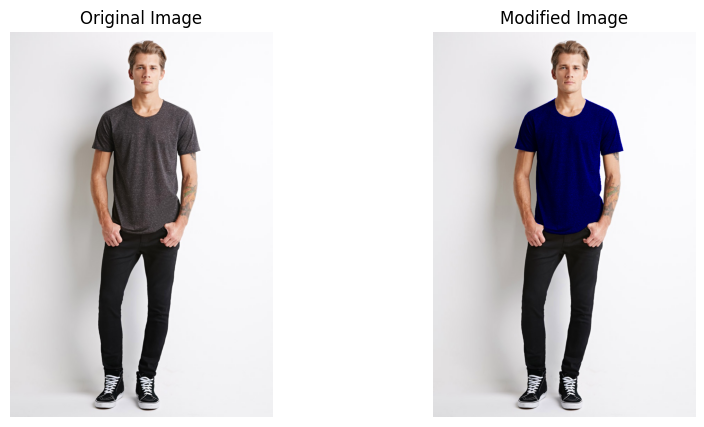

In [202]:
# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_rgb_img)
plt.title('Modified Image')
plt.axis('off')
plt.savefig('result.png')
plt.show()

<Figure size 640x480 with 0 Axes>

# Save Modified Image Result

In [191]:
print(original_img_path)
result_img_path = original_img_path.replace("data","task1")
print(result_img_path)

data/images/MEN-Denim-id_00000080-01_7_additional.jpg
task1/images/MEN-Denim-id_00000080-01_7_additional.jpg


In [189]:
import os
# Extract the directory path from the full image path
directory = os.path.dirname(result_img_path)

# Check if the directory exists, and if not, create it
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")
else:
    print(f"Directory already exists: {directory}")


Created directory: task1/images


In [190]:
im = Image.fromarray(modified_rgb_img)
im.save(result_img_path)